In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt             
%matplotlib inline   
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import matplotlib as mp
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
b_loan=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx","Data")

In [6]:
b_loan.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [7]:
b_loan.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0


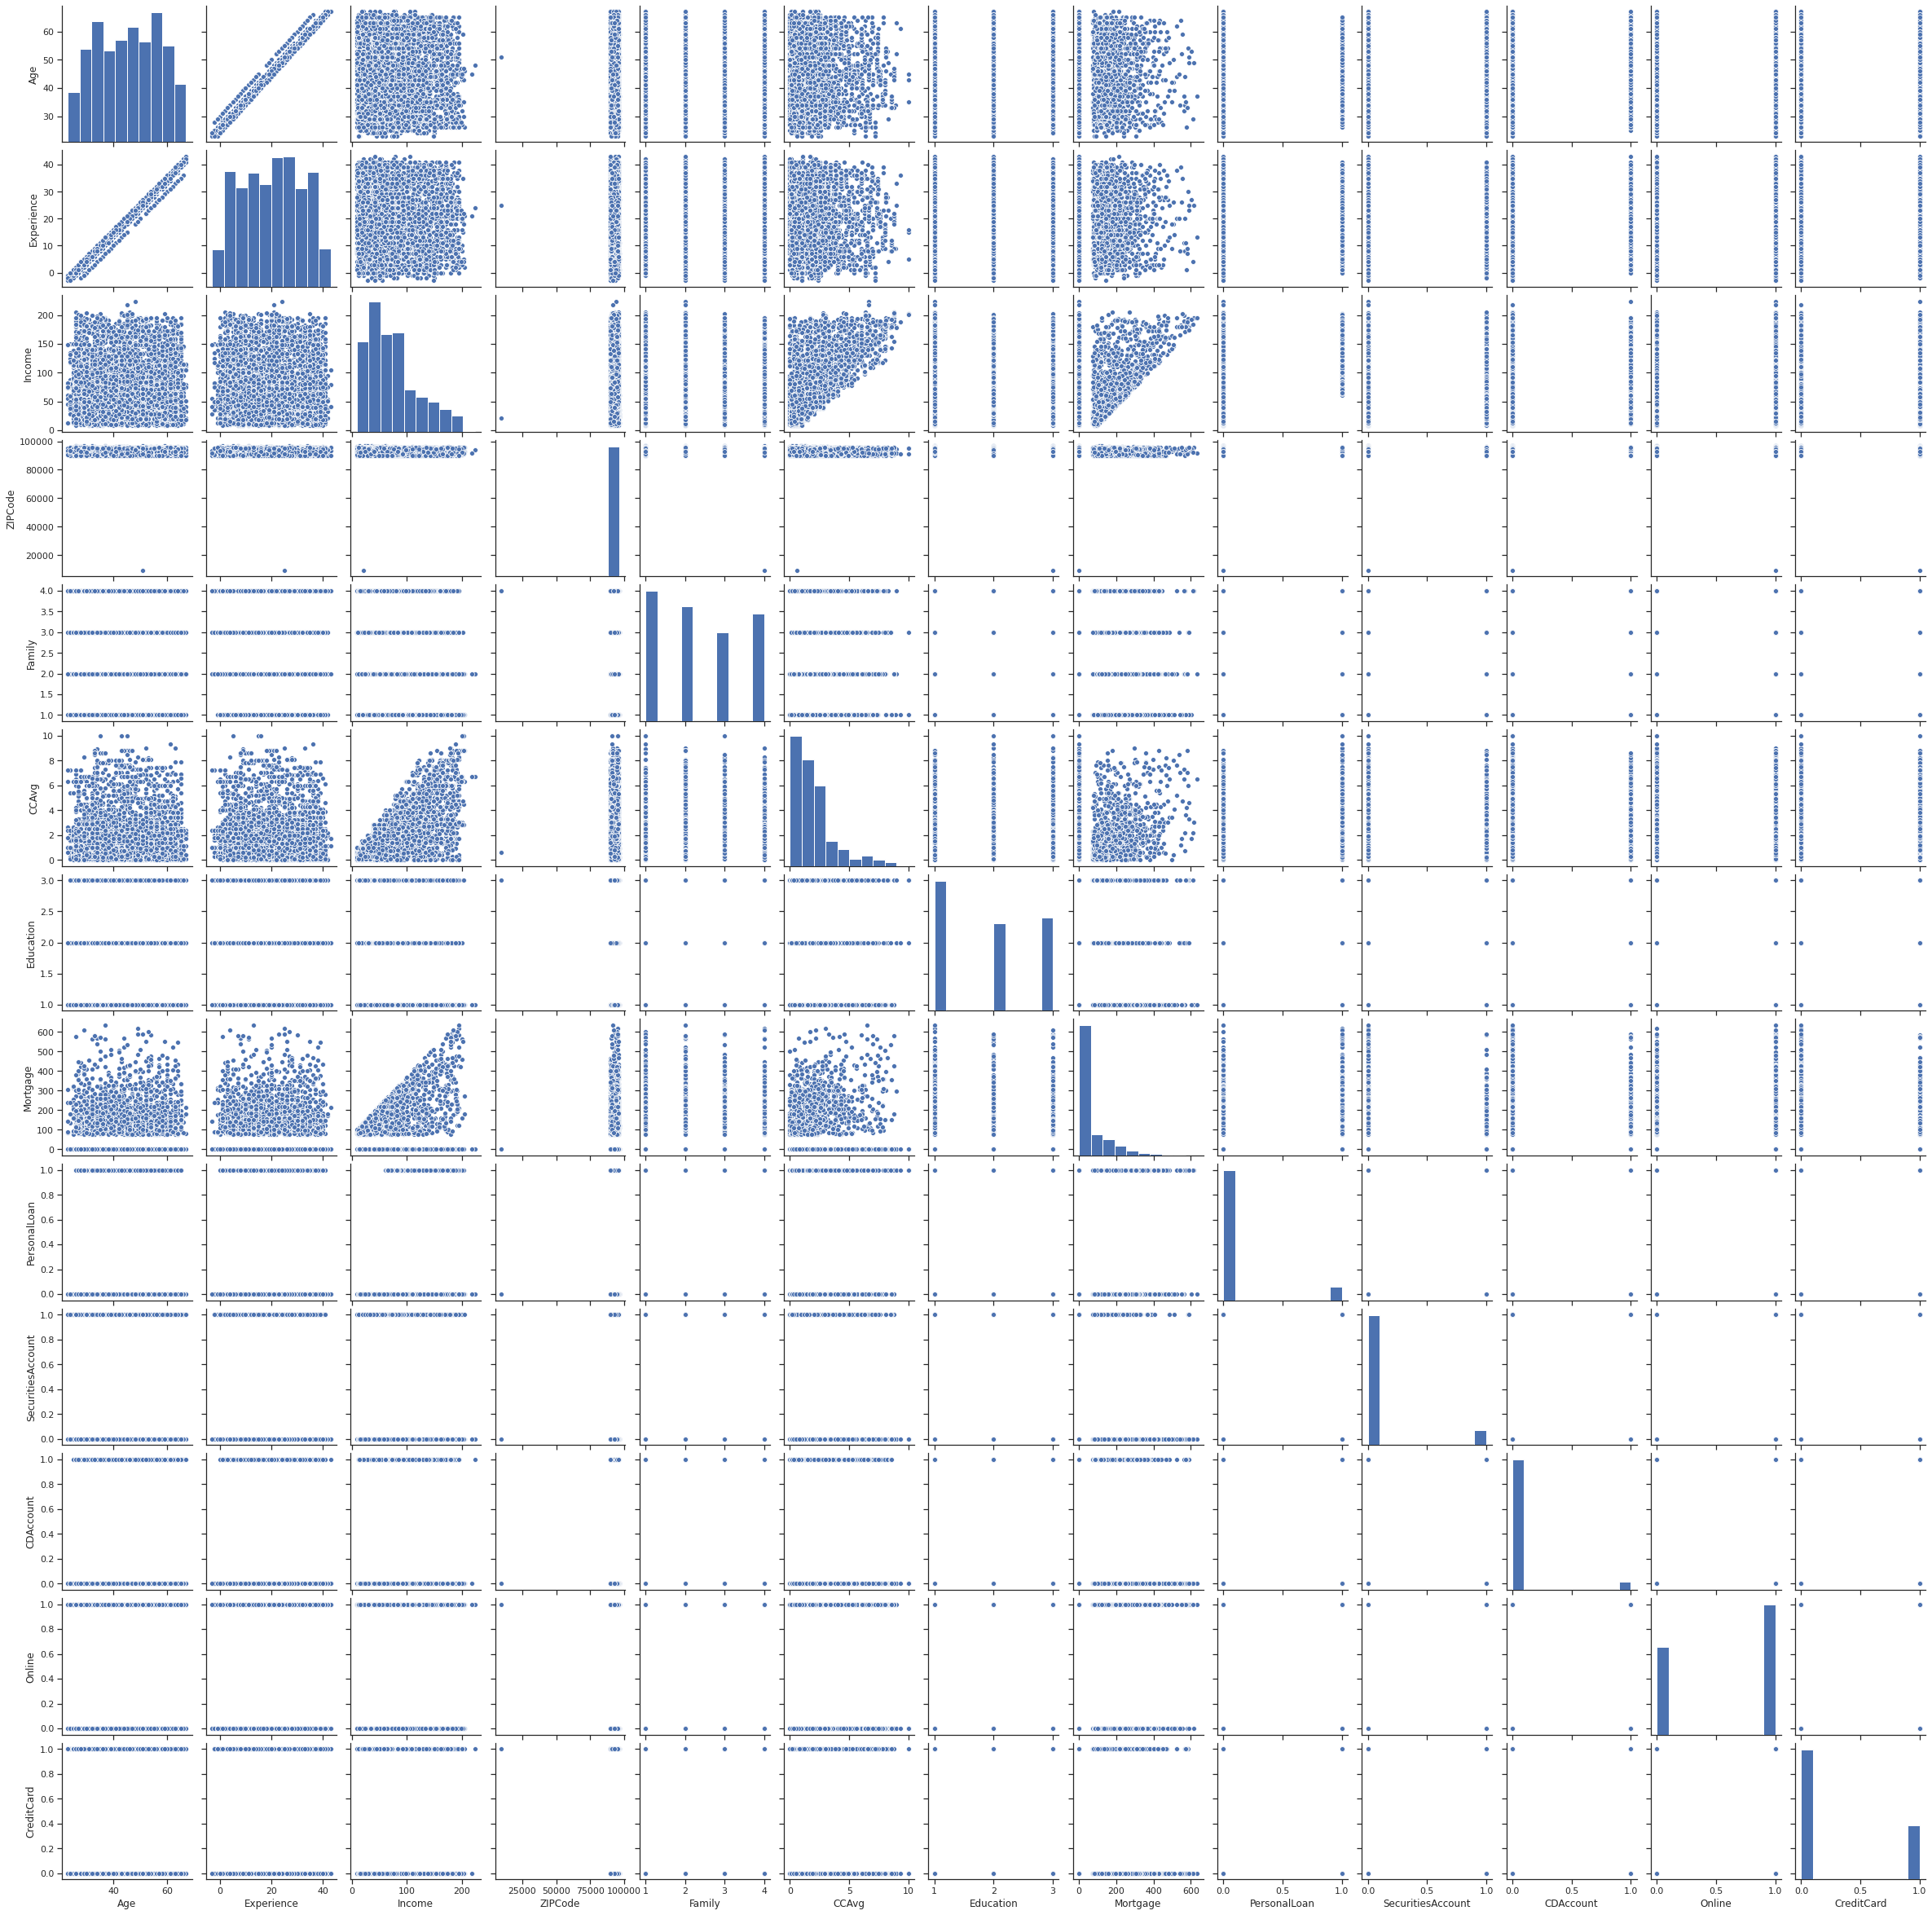

In [12]:
plt = sns.pairplot(b_loan[['Age','Experience','Income','ZIPCode','Family','CCAvg' ,'Education' , 'Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']] )
b_loan.head(1)


3. EDA: Study the data distribution in each attribute and target variable, share your
findings.

In [ ]:
loan.nunique()

In [ ]:
(b_loan['Mortgage'].values == 0).sum()


3462

In [11]:
(b_loan['CCAvg'].values == 0).sum()

106

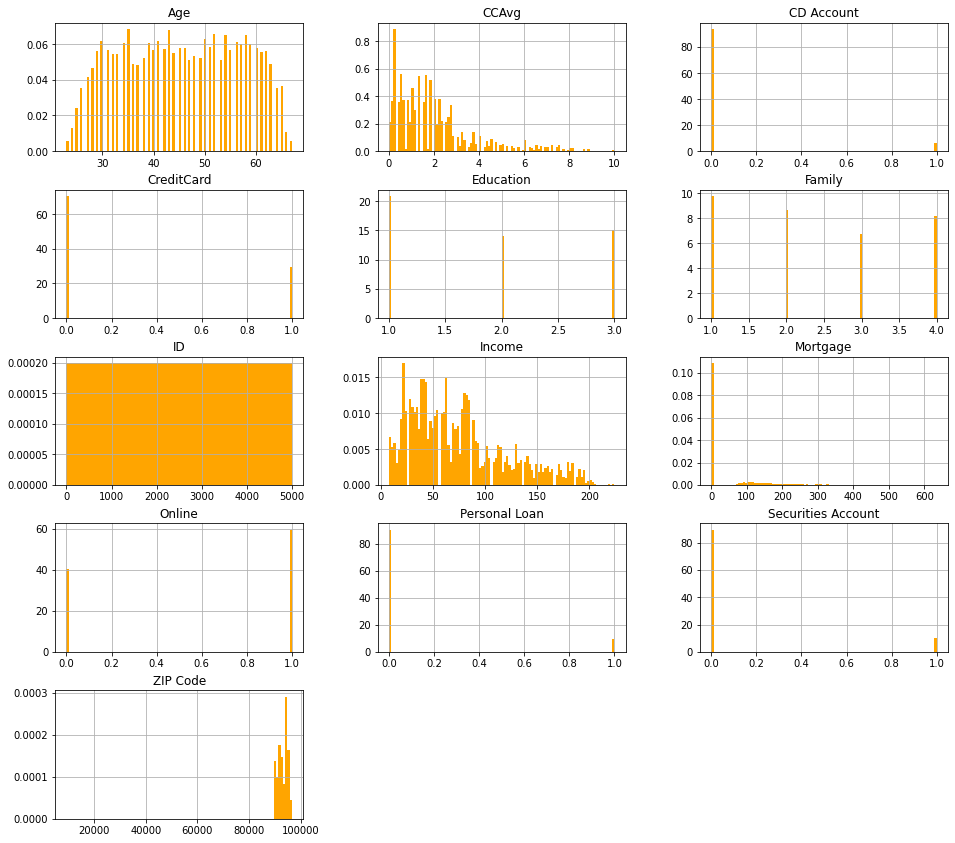

In [ ]:
columns=list(b_loan)
b_loan[columns].hist(stacked=True,density=True, bins=100,color='Orange', figsize=(16,30), layout=(10,3)); 

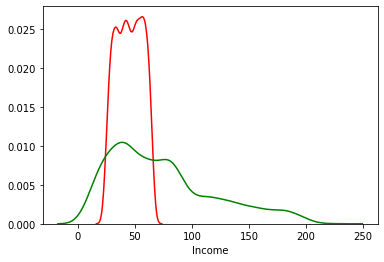

In [ ]:
sns.distplot(b_loan['Age'],kde=True,hist=False,color='Red')
sns.distplot(b_loan['Income'],kde=True,hist=False,color='Green')

plt.show()

In [ ]:
def plot_corr(b_loan, size=10):
    corr = b_loan.corr()
    fig, ax = plt.subplots(figsize=(size, 25))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

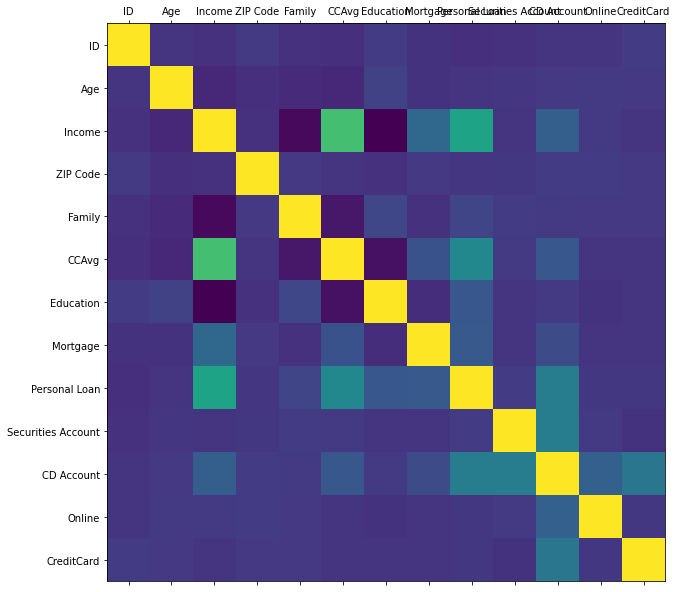

In [ ]:
plot_corr(b_loan)

We could see that Age & Experience are very strongly correlated, Hence it is fine for us to go with Age and drop Experience to avoid multi-colinearity issue.

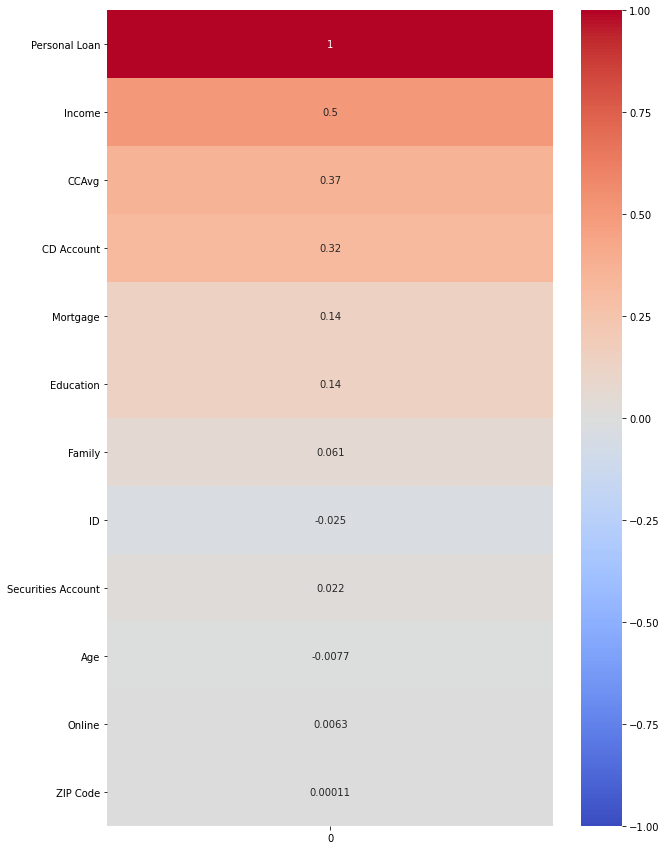

In [ ]:
#correlation between all of the numeric variables in the data frame and the target-personal_loan
#Pandas’ corrwith() method return a pair-wise correlation
correlations = b_loan.corrwith(b_loan['Personal Loan']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

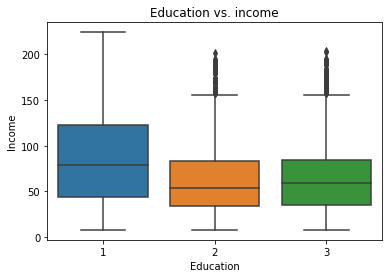

In [ ]:
#correlation with non-numeric column
sns.boxplot(b_loan['Education'],
        b_loan['Income']).set_title('Education vs. income');

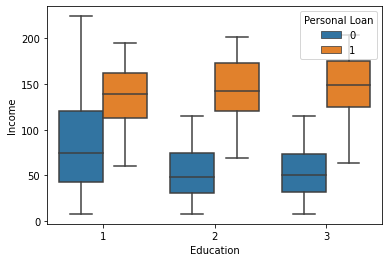

In [ ]:
sns.boxplot(b_loan['Education'],b_loan['Income'],hue=b_loan['Personal Loan']);

From the above plot we could say that Income of customers who availed personal loan are alomst same irrescpective of their Education

Text(0.5, 1.0, 'Income Distribution')

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


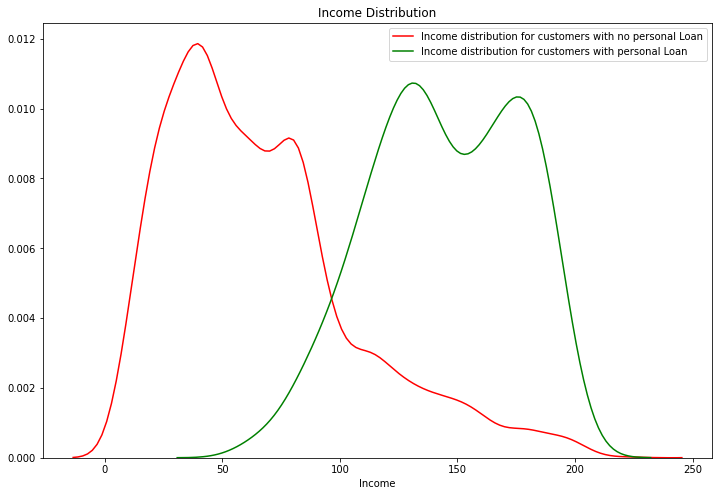

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(b_loan[b_loan['Personal Loan']==0]['Income'],kde=True,color='r',hist=False,label="Income distribution for customers with no personal Loan")
sns.distplot(b_loan[b_loan['Personal Loan']==1]['Income'],kde=True,color='G',hist=False,label="Income distribution for customers with personal Loan")
plt.legend()
plt.title("Income Distribution")

Text(0.5, 1.0, 'CCAvg Distribution')

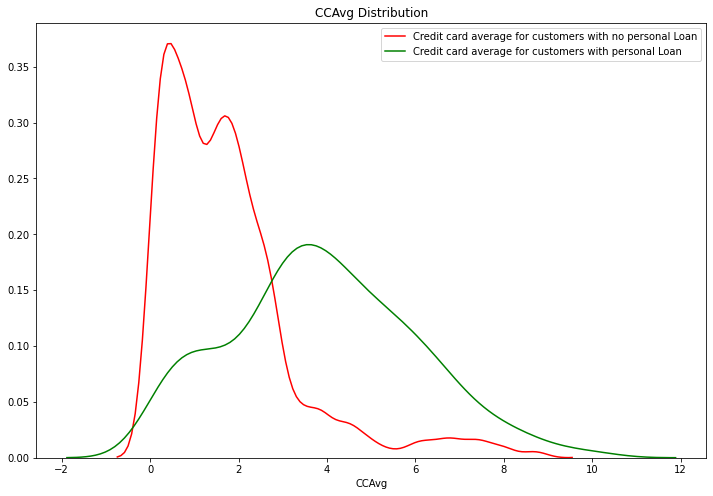

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(b_loan[b_loan['Personal Loan']==0]['CCAvg'],kde=True,hist=False,color='r',label="Credit b_loand average for customers with no personal Loan")
sns.distplot(b_loan[b_loan['Personal Loan']==1]['CCAvg'],kde=True,hist=False,color='G',label="Credit b_loand average for customers with personal Loan")
plt.legend()
plt.title("CCAvg Distribution")

Text(0.5, 1.0, 'Mortgage Distribution')

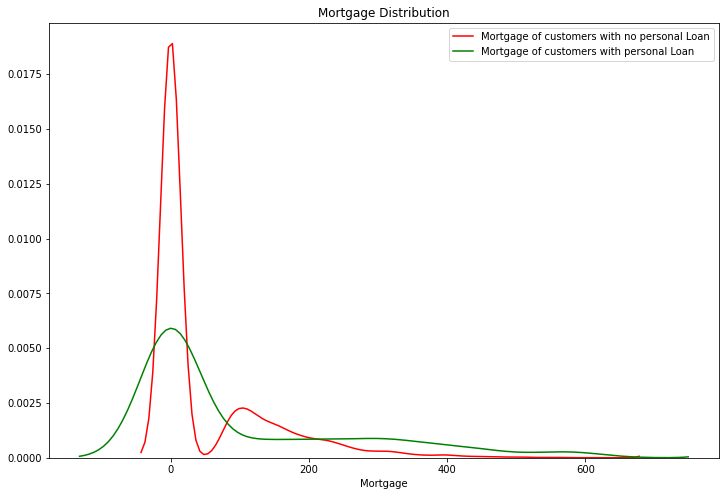

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(b_loan[b_loan['Personal Loan']==0]['Mortgage'],kde=True,hist=False,color='r',label="Mortgage of customers with no personal Loan")
sns.distplot(b_loan[b_loan['Personal Loan']==1]['Mortgage'],kde=True,hist=False,color='G',label="Mortgage of customers with personal Loan")
plt.legend()
plt.title("Mortgage Distribution")

People with high mortgage value, i.e more than 400K have availed personal Loan

<Figure size 1008x864 with 0 Axes>

<Figure size 1008x864 with 0 Axes>

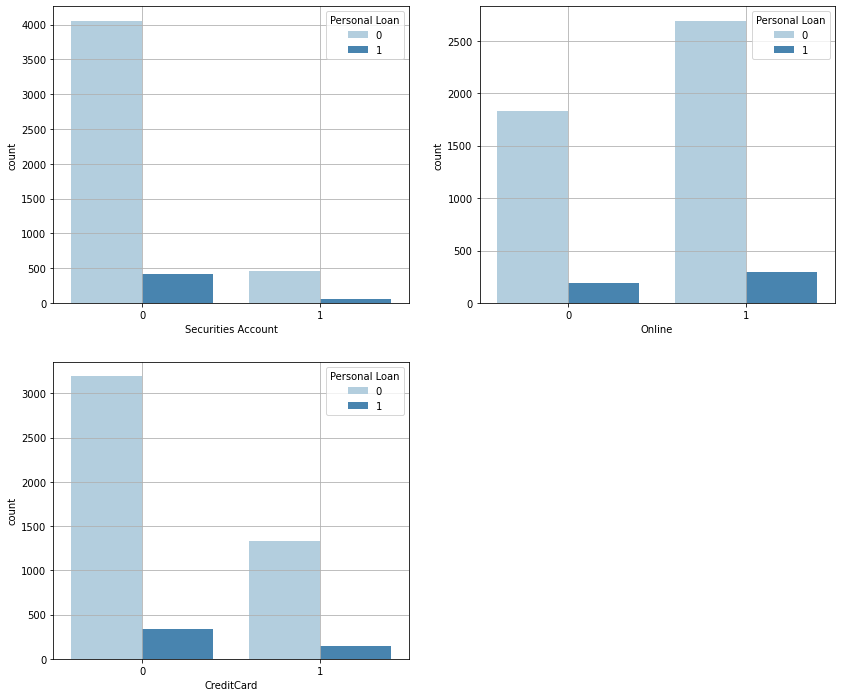

In [ ]:
col_names=['Securities Account','Online','Creditb_loand']

for i in col_names:
    plt.figure(figsize=(14,12))
j=2
k=0
for i in col_names:
    plt.subplot(2,j,j*(k+1)//j)
    sns.countplot(x=i,hue='Personal Loan',palette="Blues", data=b_loan)
    k=k+1
    plt.grid(True)
plt.show()

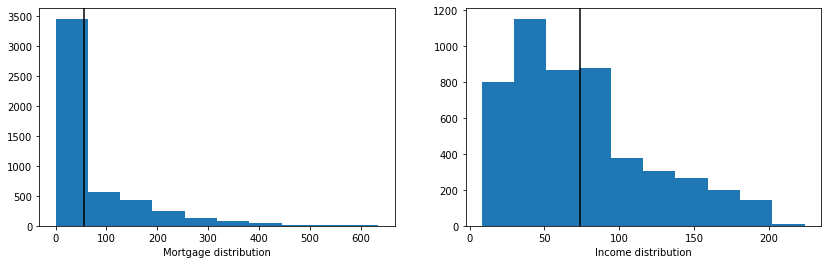

In [ ]:

fig, [ax0, ax1] = plt.subplots(1,2, figsize = (14,4))

ax0.hist(b_loan.Mortgage)
ax0.set_xlabel('Mortgage distribution')
ax0.axvline(b_loan.Mortgage.mean(), color = "black")



ax1.hist(b_loan.Income)
ax1.set_xlabel('Income distribution')
ax1.axvline(b_loan.Income.mean(), color = "black");

<Figure size 720x360 with 0 Axes>

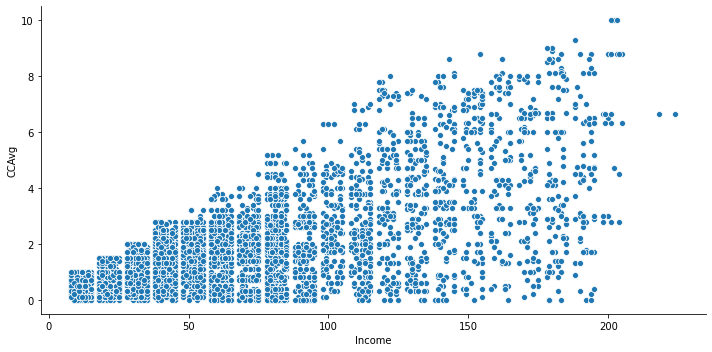

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
sns.relplot(x="Income", y="CCAvg" ,aspect = 2 ,data=b_loan)
plt.show()
plt.clf()

Income and credit b_loand average use is also related in a linear fashion and is more dense in the income bracket of 50k-100k bracket.

<Figure size 720x360 with 0 Axes>

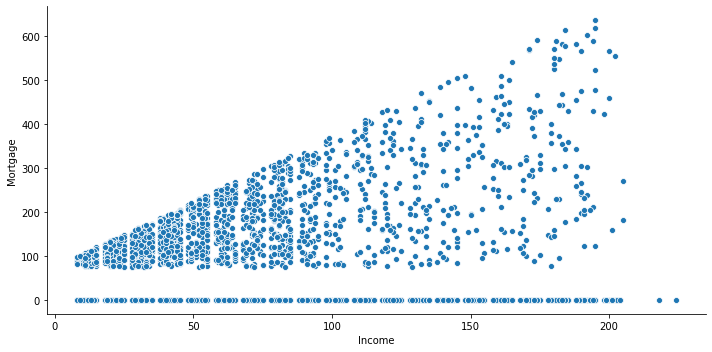

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
sns.relplot(x="Income", y="Mortgage" ,aspect = 2 ,data=b_loan)
plt.show()
plt.clf()

Income and Mortgage is a linear relation. The datapoints become sparse towards the end which justify that higher income customers have either cleared out mortgages or don't have any

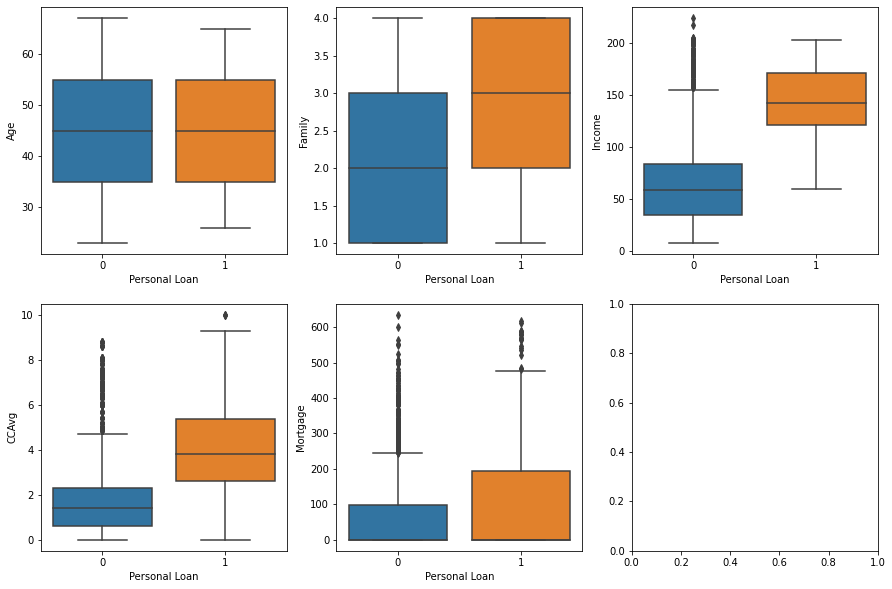

<Figure size 432x288 with 0 Axes>

In [ ]:
numerical = ['Age' ,'Family' ,'Income' , 'CCAvg' , 'Mortgage']
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x='Personal Loan', y=var, data=b_loan, ax=subplot)
plt.show()
plt.clf()

4. Apply necessary transformations for the feature variables

In [ ]:
X = b_loan[['ID', 'Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education','Mortgage', 'Securities Account', 'CD Account','Online', 'Creditb_loand']].values
y = b_loan['Personal Loan'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

5. Normalise your data and split the data into training and test set in the ratio of 70:30
respectively

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

6. Use the Logistic Regression model to predict the likelihood of a customer buying
personal loans.

In [ ]:
print(b_loan['Personal Loan'].value_counts())
No_of_customers_availed_PL=b_loan[b_loan['Personal Loan']==1].shape[0]
No_of_customers_availed_PL
Total_Cust=b_loan.shape[0]
percet=(No_of_customers_availed_PL * 100)/Total_Cust 
print("Overall percentage of customers who have availed personal Loan:{}".format(percet),"%")

0    4520
1     480
Name: Personal Loan, dtype: int64
Overall percentage of customers who have availed personal Loan:9.6 %


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Split our Data into Dependent Variables & Independent Variables 

X=b_loan.drop(['Personal Loan'],axis=1)
y=b_loan['Personal Loan']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

NameError: ignored

7. Print all the metrics related for evaluating the model performance

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.10266666666666667
Root Mean Squared Error: 0.3204163957519444
R2 Score: -0.09556037201625789


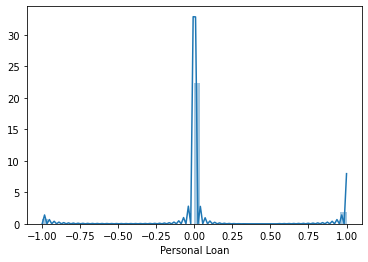

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
b_loan.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(b_loan.drop(['Experience' ,'ID' ,'CCAvg'], axis=1), test_size=0.3 , random_state=53)

In [15]:
train_set.describe()

,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.458286,73.814571,93176.260286,2.402857,1.890286,57.439714,0.094857,0.106857,0.061143,0.595714,0.296286
std,11.498213,45.987910,1739.659921,1.148576,0.840846,101.949410,0.293059,0.308976,0.239626,0.490823,0.456684
min,23.000000,8.000000,90005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,92007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,64.000000,93407.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,99.000000,94608.000000,3.000000,3.000000,102.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
test_set.describe()

,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,45.058667,73.680000,93097.069333,2.381333,1.859333,54.303333,0.098667,0.098667,0.058667,0.599333,0.288667
std,11.379875,46.155684,2818.830809,1.145772,0.837465,101.161761,0.298313,0.298313,0.235078,0.490197,0.453294
min,23.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,91768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,93555.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,95.000000,94608.000000,3.000000,3.000000,97.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,205.000000,96651.000000,4.000000,3.000000,612.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
train_labels = train_set.pop("PersonalLoan")
test_labels = test_set.pop("PersonalLoan")

In [18]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3)

In [19]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
dt_model.score(test_set , test_labels)

0.974

In [21]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.9166666666666666

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1296,69
Yes,56,79


In [23]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

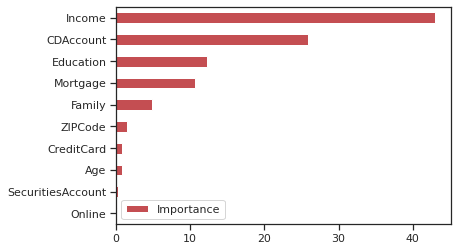

In [24]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [25]:
predicted_random=randomforest_model.predict(test_set)

In [26]:
randomforest_model.score(test_set,test_labels)

0.9133333333333333

In [27]:
train_set_indep = b_loan.drop(['Experience' ,'ID' ,'CCAvg'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_indep_z = train_set_indep.apply(zscore)
train_set_dep = b_loan["PersonalLoan"]
X = np.array(train_set_indep_z)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [28]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)

In [29]:
print(acc)

0.9446297531687792


# **Business Model**
### The model makes a predictive analysis based upon previous record of the customer data.
The model uses the various component os customers like age, experience, income as an input.
Now, The model analyses these input components and then gives the output in the form wether it is suitable or not to give a loan to a particular customer.

This kinds of prediction is not possible normally but with the help of some mathematical algorithms(i.e logistic regression) over a huge dataset it become possible to get an accurate prediction.
It helps the banking system to get rid off fraudulance.